In [7]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

In [12]:
df = sage_data_client.query(
    start="2024-06-23T02:00:00.000Z",
    end="2024-06-23T07:00:00.000Z", 
    filter={
        "plugin": "10.31.81.1:5000/local/waggle-wxt536*",
        "vsn": "W096"
    }
)


KeyboardInterrupt



In [124]:
df = df.set_index("timestamp")

In [126]:
# Determine number of columns within dataset
df.columns

Index(['name', 'value', 'meta.host', 'meta.job', 'meta.missing', 'meta.node',
       'meta.plugin', 'meta.sensor', 'meta.task', 'meta.units', 'meta.vsn',
       'meta.zone'],
      dtype='object')

In [4]:
# Determine the number of unique measurements within 'name' column
print(set(df['value']))

NameError: name 'df' is not defined

In [130]:
# isolate the environmental temperature data
rainfall = df.loc[df['name'] == 'wxt.rain.accumulation']

Total precipitation for node W096: 37.42 mm


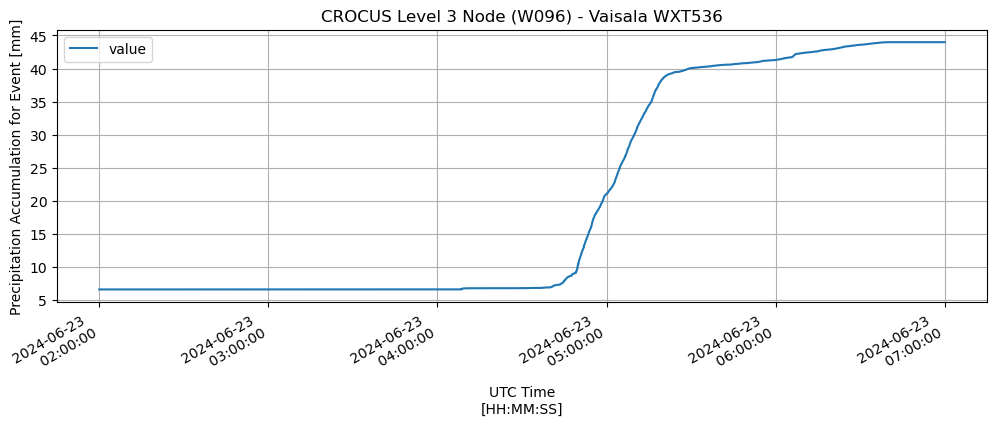

In [141]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")


rainfall.plot(xlabel="UTC Time\n[HH:MM:SS]",ylabel='Precipitation Accumulation for Event [mm]', title='CROCUS Level 3 Node (W096) - Vaisala WXT536', ax=axs)
total_precip = rainfall['value'].max() - rainfall['value'].min()
print(f'Total precipitation for node W096: {total_precip:.2f} mm')

axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

Total precipitation for node W096: 45.48 mm
Total precipitation for node W0B9: 28.46 mm
Total precipitation for node W023: 38.00 mm


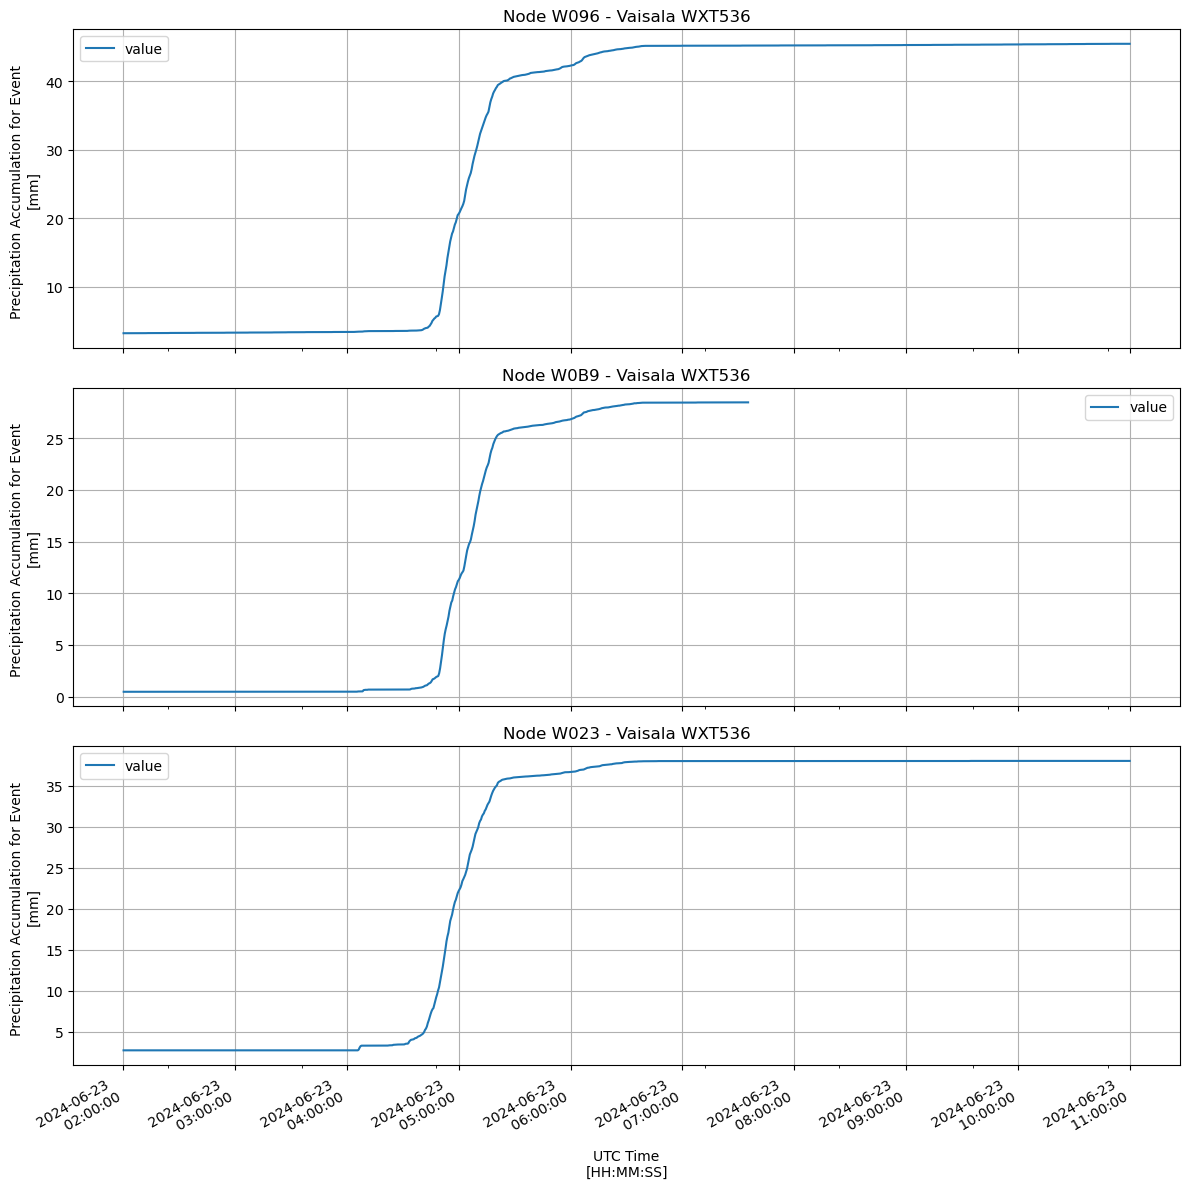

In [101]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.dates import DateFormatter

# List of node IDs to pull data from
node_ids = ["W096"]  # Add more node IDs as needed

# Define the time range for the query
start_time = "2024-06-23T02:00:00.000Z"
end_time = "2024-06-23T11:00:00.000Z"

# Set up the figure and subplots
fig, axs = plt.subplots(len(node_ids), 1, figsize=(12, 4 * len(node_ids)), sharex=True)

# Define the date format for the x-axis
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Loop through each node ID and plot the data
for i, node_id in enumerate(node_ids):
    df = sage_data_client.query(
        start=start_time,
        end=end_time,
        filter={
            "plugin":"10.31.81.1:5000/local/waggle-wxt536*",
            "vsn": node_id
        }
        
    )
    df = df.set_index("timestamp")
    
    # Isolate the rainfall data
    rainfall = df.loc[df['name'] == 'env.raingauge.event_acc']
    
    total_precip = rainfall['value'].max() - rainfall['value'].min()
    print(f'Total precipitation for node {node_id}: {total_precip:.2f} mm')
    
    # Plot the data
    ax = axs[i]
    rainfall.plot(xlabel="UTC Time\n[HH:MM:SS]", ylabel='Precipitation Accumulation for Event \n[mm]', title=f'Node {node_id} - Vaisala WXT536', ax=ax)
    
    # Format the x-axis
    ax.xaxis.set_major_formatter(date_form)
    ax.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.savefig("rain.png", bbox_inches='tight')
plt.show()


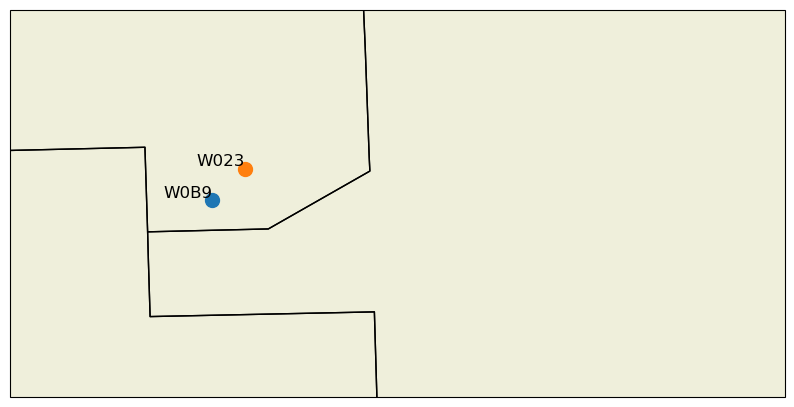

In [99]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from metpy.plots import USCOUNTIES

# Define the node IDs, latitudes, and longitudes
node_ids = ["W0B9", "W023"]
latitudes = [41.701432787, 41.717805]
longitudes = [-87.995551655, -87.978575]

# Create a new figure and set the projection to PlateCarree
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to zoom into the Chicago area
ax.set_extent([-88.1, -87.7, 41.6, 41.8], crs=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(USCOUNTIES)



# Plot the points with labels
for lat, lon, label in zip(latitudes, longitudes, node_ids):
    ax.plot(lon, lat, 'o', transform=ccrs.PlateCarree(), markersize=10)
    ax.text(lon, lat, label, transform=ccrs.PlateCarree(),
            fontsize=12, ha='right', va='bottom')


# Show the plot
plt.show()


In [9]:
# Query the SAGE data client to access the data
# Note: We need to know the time period we are interested in
df = sage_data_client.query(start="2024-06-23T00:00:00Z",
                            end="2024-06-23T12:00:00Z", 
                            filter={
                                "vsn": "W096",
                                "sensor": "vaisala-wxt536"
                            }
)

In [20]:
df = df.set_index("timestamp")
df.index

DatetimeIndex(['2024-06-22 23:59:00.059870242+00:00',
               '2024-06-22 23:59:00.147295809+00:00',
               '2024-06-22 23:59:00.233479802+00:00',
               '2024-06-22 23:59:00.319779571+00:00',
               '2024-06-22 23:59:00.405735594+00:00',
               '2024-06-22 23:59:00.499932684+00:00',
               '2024-06-22 23:59:00.586125989+00:00',
               '2024-06-22 23:59:00.672692927+00:00',
               '2024-06-22 23:59:00.767763685+00:00',
               '2024-06-22 23:59:00.854205599+00:00',
               ...
               '2024-06-23 07:59:59.142569863+00:00',
               '2024-06-23 07:59:59.229854358+00:00',
               '2024-06-23 07:59:59.317334374+00:00',
               '2024-06-23 07:59:59.405100695+00:00',
               '2024-06-23 07:59:59.492793895+00:00',
               '2024-06-23 07:59:59.580377271+00:00',
               '2024-06-23 07:59:59.668120872+00:00',
               '2024-06-23 07:59:59.755589784+00:00',
         

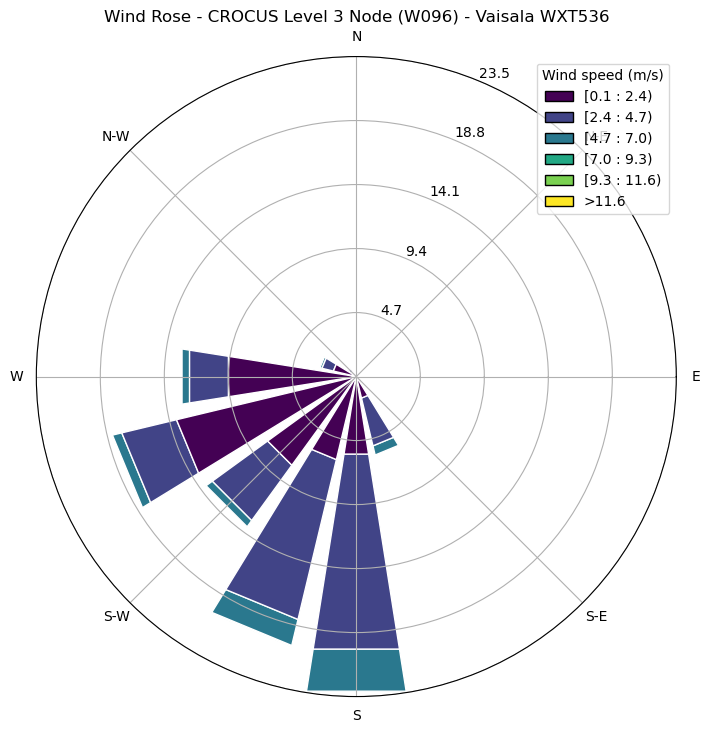

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes


wind_speed = df.loc[df['name'] == 'wxt.wind.speed', 'value'].values
wind_direction = df.loc[df['name'] == 'wxt.wind.direction', 'value'].values


fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white', cmap=plt.cm.viridis)

ax.legend(title="Wind speed (m/s)", loc='best')

plt.title('Wind Rose - CROCUS Level 3 Node (W096) - Vaisala WXT536')
plt.savefig('wind_rose.png', bbox_inches='tight')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with data
# Convert 'timestamp' to datetime

# Extract the data for different variables
humidity = df.loc[df['name'] == 'wxt.env.humidity', 'value']
temp = df.loc[df['name'] == 'wxt.env.temp', 'value']
pressure = df.loc[df['name'] == 'wxt.env.pressure', 'value']
rainfall_accum = df.loc[df['name'] == 'wxt.rain.accumulation', 'value']

# Convert data to numeric, replacing 'm' with NaN and dropping NaNs
humidity = pd.to_numeric(humidity.replace('m', np.nan), errors='coerce').dropna()
temp = pd.to_numeric(temp.replace('m', np.nan), errors='coerce').dropna()
pressure = pd.to_numeric(pressure.replace('m', np.nan), errors='coerce').dropna()
rainfall_accum = pd.to_numeric(rainfall_accum.replace('m', np.nan), errors='coerce').dropna()

# Create DataFrames for plotting
humidity_data = pd.DataFrame({'humidity': humidity})
temp_data = pd.DataFrame({'temp': temp})
pressure_data = pd.DataFrame({'pressure': pressure})
rain_data = pd.DataFrame({'rainfall_accum': rainfall_accum})

# Set up the figure and subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot humidity
axes[0].plot(humidity_data.index, humidity_data['humidity'], c='blue', alpha=0.5, label='Humidity')
axes[0].set_ylabel('Humidity (%)')
axes[0].set_title('Humidity Trend Over Time')
axes[0].legend()
axes[0].grid(True)

# Plot temperature
axes[1].plot(temp_data.index, temp_data['temp'], c='red', alpha=0.5, label='Temperature')
axes[1].set_ylabel('Temperature (C)')
axes[1].set_title('Temperature Trend Over Time')
axes[1].legend()
axes[1].grid(True)

# Plot pressure
axes[2].plot(pressure_data.index, pressure_data['pressure'], c='green', alpha=0.5, label='Pressure')
axes[2].set_ylabel('Pressure (hPa)')
axes[2].set_title('Pressure Trend Over Time')
axes[2].legend()
axes[2].grid(True)

# Plot rainfall accumulation
axes[3].plot(rain_data.index, rain_data['rainfall_accum'], c='orange', alpha=0.5, label='Rainfall Accumulation')
axes[3].set_xlabel('Time')
axes[3].set_ylabel('Rainfall (mm)')
axes[3].set_title('Rainfall Accumulation')
axes[3].legend()
axes[3].grid(True)

# Format x-axis as dates
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


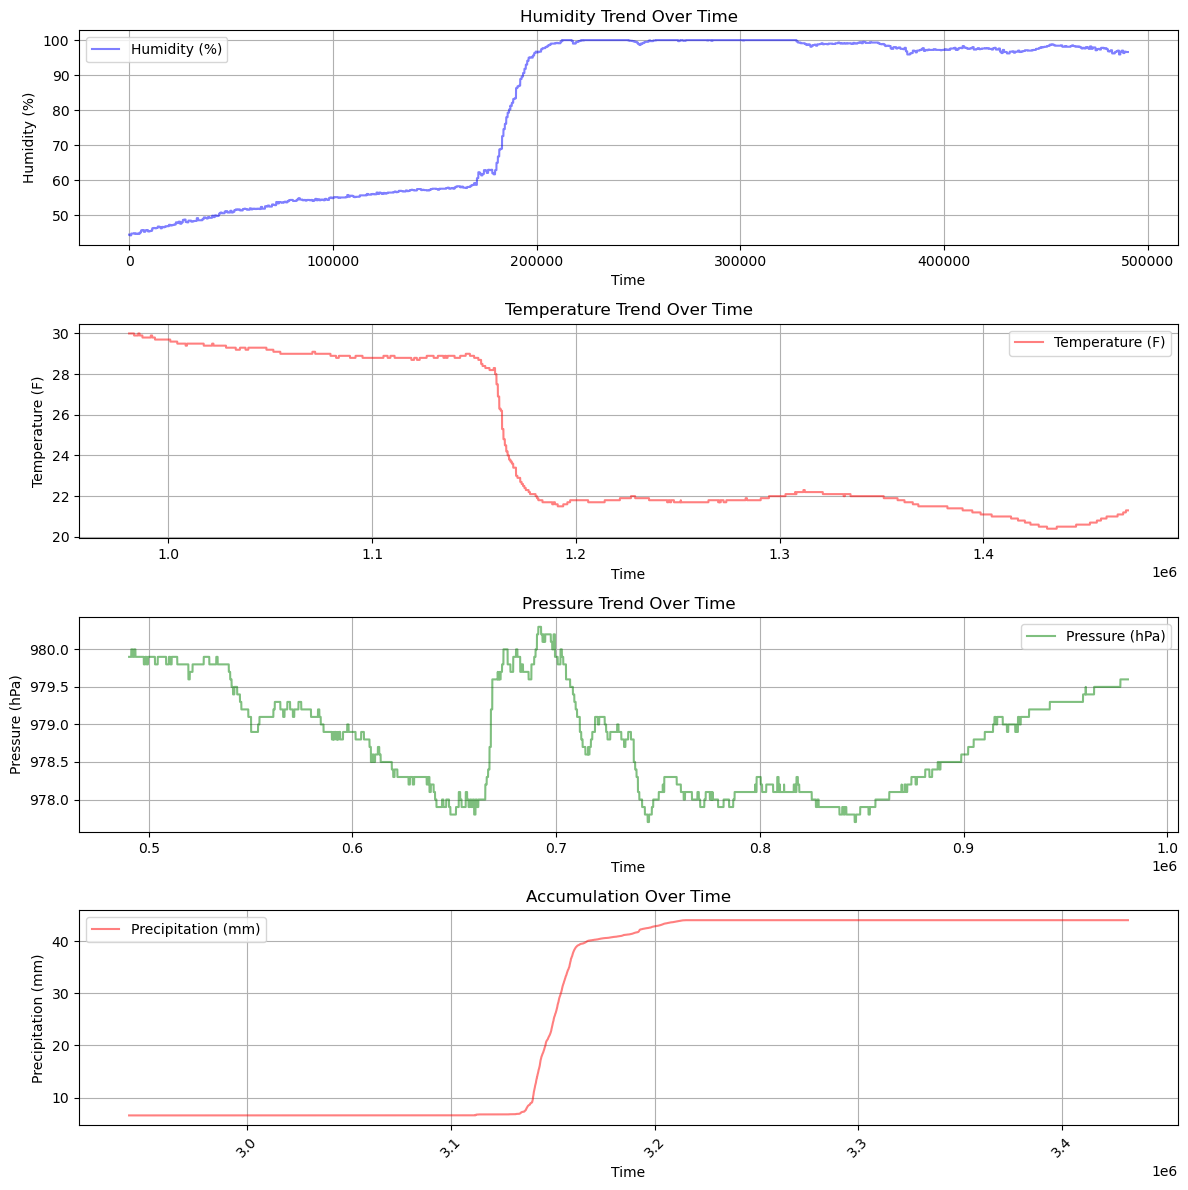

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded with the relevant data
humidity = df.loc[df['name'] == 'wxt.env.humidity', 'value']
temp = df.loc[df['name'] == 'wxt.env.temp', 'value']
pressure = df.loc[df['name'] == 'wxt.env.pressure', 'value']
rainfall_accum = df.loc[df['name'] == 'wxt.rain.accumulation', 'value']

# Convert data to numeric, replacing 'm' with NaN and dropping NaNs
humidity = pd.to_numeric(humidity.replace('m', np.nan), errors='coerce').dropna()
temp = pd.to_numeric(temp.replace('m', np.nan), errors='coerce').dropna()
pressure = pd.to_numeric(pressure.replace('m', np.nan), errors='coerce').dropna()
rainfall_accum = pd.to_numeric(rainfall_accum.replace('m', np.nan), errors='coerce').dropna()

# Create DataFrames for plotting
humidity_data = pd.DataFrame({'humidity': humidity})
temp_data = pd.DataFrame({'temp': temp})
pressure_data = pd.DataFrame({'pressure': pressure})
rain_data = pd.DataFrame({'rainfall_accum': rainfall_accum})

# Function to plot a trend
def plot_trend(ax, data, column, color, ylabel, title):
    ax.plot(data.index, data[column], c=color, alpha=0.5, label=ylabel)
    ax.set_xlabel('Time')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

# Create the figure with 3 subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 12))

# Plot each trend using the plot_trend function
plot_trend(axes[0], humidity_data, 'humidity', 'blue', 'Humidity (%)', 'Humidity Trend Over Time')
plot_trend(axes[1], temp_data, 'temp', 'red', 'Temperature (F)', 'Temperature Trend Over Time')
plot_trend(axes[2], pressure_data, 'pressure', 'green', 'Pressure (hPa)', 'Pressure Trend Over Time')
plot_trend(axes[3], rain_data, 'rainfall_accum', 'red', 'Precipitation (mm)', 'Accumulation Over Time')

plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("23rdWXT.png", bbox_inches='tight')
plt.show()

